# Úkol: BI-PST


Spolupracovali:
   * Ondřej Hladůvka (reprezentant)
   * Tomáš Kaňka

In [31]:
#import csv
#import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#np.set_printoptions(precision=3)
#from sympy import *
from scipy import stats 
from scipy.stats import norm, uniform, expon
#from scipy.optimize import minimize

In [2]:
K = 28
L = 8
M = (((K + L) * 47) % 11) + 1
print("M =",M)
print("dataset ex0221")

M = 10
dataset ex0221


## Úloha č. 1

(1b) Načtěte datový soubor a rozdělte sledovanou proměnnou na příslušné dvě pozorované skupiny.
Stručně popište data a zkoumaný problém. Pro každou skupinu zvlášť odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení.

In [4]:
# načtení dat
df = pd.read_csv("/data.csv")
df = df.drop(df.columns[0], axis=1)
survived = df[df['Status'] == 'survived']['Weight'].values
perished = df[df['Status'] == 'perished']['Weight'].values
# informace
print("Prvních 5 řádků:")
print(df.head())
print("Info")
print("Počet řádků:", df.shape[0])
print("Datové typy:")
display(df.info())


Prvních 5 řádků:
      Weight    Status
0  24.500000  survived
1  26.900000  survived
2  26.900000  survived
3  24.299999  survived
4  24.100000  survived
Info
Počet řádků: 59
Datové typy:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  59 non-null     float64
 1   Status  59 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


None

Tento datový soubor zkoumá, zda hmotnost dospělých samců vrabců hraje roli v jejich přežití během extrémních klimatických podmínek. Cílem je zjistit, zda vrabci, kteří přežili, měli významně jinou průměrnou hmotnost ve srovnání se vrabci, kteří zahynuli. 

Tabulak má dva sloupce weight a status, kde
**weight** udává hmotnost dospělých samců vrabců v gramech a
**status**  udává, zda vrabec přežil nebo zahynul během zimní bouře. Může mít hodnoty "survived" (přežil) nebo "perished" (zahynul).


In [5]:
# Zobrazení názvů sloupců
print(df.columns)

groups = df.groupby('Status')
summary_stats = groups['Weight'].agg(['mean', 'var', 'median']).reset_index()

# Zobrazení výsledků
print(summary_stats)

Index(['Weight', 'Status'], dtype='object')
     Status       mean       var     median
0  perished  26.275000  2.168043  26.000000
1  survived  25.462857  1.584756  25.700001


## Úloha č. 2

(1b) Pro každou skupinu zvlášť odhadněte hustotu a distribuční funkci pomocí histogramu a empirické distribuční funkce.

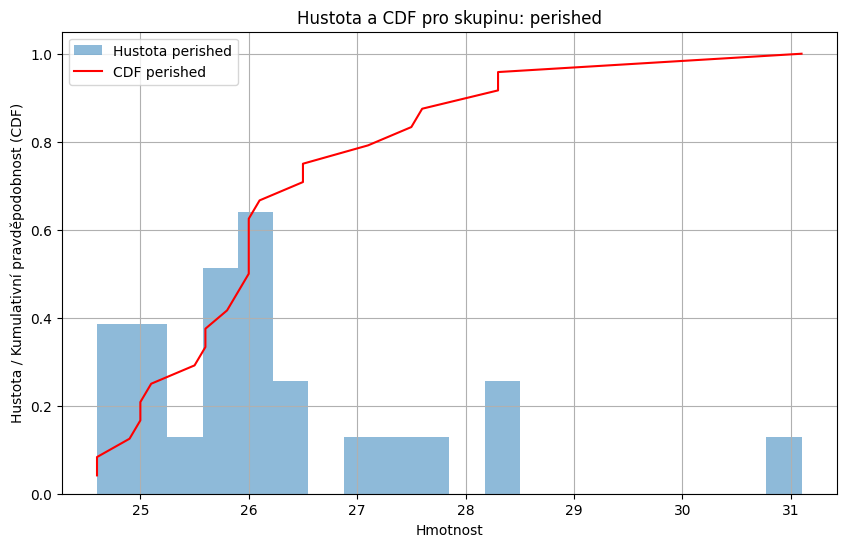


--- Výsledky pro skupinu: perished ---
       Weight       CDF
0   24.600000  0.041667
1   24.600000  0.083333
2   24.900000  0.125000
3   25.000000  0.166667
4   25.000000  0.208333
5   25.100000  0.250000
6   25.500000  0.291667
7   25.600000  0.333333
8   25.600000  0.375000
9   25.799999  0.416667
10  25.900000  0.458333
11  26.000000  0.500000
12  26.000000  0.541667
13  26.000000  0.583333
14  26.000000  0.625000
15  26.100000  0.666667
16  26.500000  0.708333
17  26.500000  0.750000
18  27.100000  0.791667
19  27.500000  0.833333
20  27.600000  0.875000
21  28.299999  0.916667
22  28.299999  0.958333
23  31.100000  1.000000


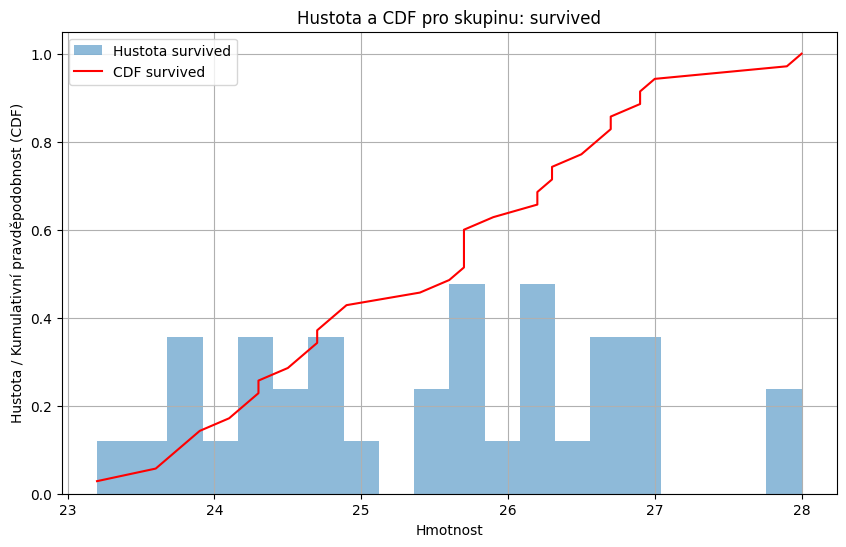


--- Výsledky pro skupinu: survived ---
       Weight       CDF
0   23.200001  0.028571
1   23.600000  0.057143
2   23.700001  0.085714
3   23.799999  0.114286
4   23.900000  0.142857
5   24.100000  0.171429
6   24.200001  0.200000
7   24.299999  0.228571
8   24.299999  0.257143
9   24.500000  0.285714
10  24.600000  0.314286
11  24.700001  0.342857
12  24.700001  0.371429
13  24.799999  0.400000
14  24.900000  0.428571
15  25.400000  0.457143
16  25.600000  0.485714
17  25.700001  0.514286
18  25.700001  0.542857
19  25.700001  0.571429
20  25.700001  0.600000
21  25.900000  0.628571
22  26.200001  0.657143
23  26.200001  0.685714
24  26.299999  0.714286
25  26.299999  0.742857
26  26.500000  0.771429
27  26.600000  0.800000
28  26.700001  0.828571
29  26.700001  0.857143
30  26.900000  0.885714
31  26.900000  0.914286
32  27.000000  0.942857
33  27.900000  0.971429
34  28.000000  1.000000


In [6]:
def calculate_density_cdf(group):
    sorted_weights = group.sort_values('Weight')
    cdf = pd.Series(range(1, len(sorted_weights) + 1)) / len(sorted_weights)
    results = pd.DataFrame({'Weight': sorted_weights['Weight'].values, 'CDF': cdf.values})
    
    return results

groups = df.groupby('Status')
density_cdf_results = {}

for name, group in groups:
    density_cdf_results[name] = calculate_density_cdf(group)

for name, results in density_cdf_results.items():
    plt.figure(figsize=(10, 6))
    plt.hist(df[df['Status'] == name]['Weight'], bins=20, density=True, alpha=0.5, label=f'Hustota {name}')
    
    # CDF
    plt.plot(results['Weight'], results['CDF'], label=f'CDF {name}', color='red')
    
    # Nastavení g
    plt.title(f'Hustota a CDF pro skupinu: {name}')
    plt.xlabel('Hmotnost')
    plt.ylabel('Hustota / Kumulativní pravděpodobnost (CDF)')
    plt.legend()
    plt.grid()
    plt.show()
    print(f"\n--- Výsledky pro skupinu: {name} ---")
    print(results)




Vytvořili jsme funkci calculate_density_cdf, která seřadila data podle hmotnosti a spočítala kumulativní distribuční funkci. Tato funkce vrátila DataFrame se seřazenými hmotnostmi a odpovídajícími hodnotami CDF.

## Úloha č. 3

(3b) Pro každou skupinu zvlášť najděte nejbližší rozdělení: 
Odhadněte parametry normálního, exponenciálního a rovnoměrného rozdělení.
Zaneste příslušné hustoty s odhadnutými parametry do grafů histogramu. Diskutujte, které z rozdělení odpovídá pozorovaným datům nejlépe.

Odhady získáme pomocí momentové metody

In [7]:
def show_distribution(data):
    fig = plt.figure(figsize = (10, 14))
    gs = fig.add_gridspec(4,2, figure = fig)
    sp1 = fig.add_subplot(gs[0, 0])
    sp2 = fig.add_subplot(gs[0, 1])
    sp3 = fig.add_subplot(gs[1, 0])
    sp4 = fig.add_subplot(gs[1, 1])
    sp5 = fig.add_subplot(gs[ 2:, 0:])
    
    sp1.set_title('Data Histogram')
    sp1.hist(data, bins=10, density=True, alpha=0.5)
    sp2.hist(data, bins=10, density=True, alpha=0.5)
    sp3.hist(data, bins=10, density=True, alpha=0.5)
    sp4.hist(data, bins=10, density=True, alpha=0.5)
    sp5.hist(data, bins=10, density=True, alpha=0.5)
    
    mu, std = norm.fit(data)
    xmin, xmax = sp1.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p_norm = norm.pdf(x, mu, std)
    sp2.plot(x, p_norm, 'red')
    sp2.fill_between(x, p_norm, alpha=0.2, color='red')
    sp2.set_title(f'Normal fit ($\mu={mu:.2f}, \sigma={std:.2f}$)')

    loc, scale = expon.fit(data)
    p_exp = expon.pdf(x, loc, scale)
    split0 = next((i for i, x in enumerate(p_exp) if x != 0), len(p_exp))
    sp3.plot(x[split0:], p_exp[split0:], 'green')
    sp3.fill_between(x[split0:], p_exp[split0:], alpha=0.2, color='green')
    sp3.set_title(f'Exponential Distribution Fit (scale={scale:.2f})')

    loc_uni, scale_uni = uniform.fit(data)
    p_uni = uniform.pdf(x, loc_uni, scale_uni)
    split1 = next((i for i, x in enumerate(p_uni) if x != 0), len(p_uni))
    split2 = -next((i for i, x in enumerate(reversed(p_uni)) if x != 0), len(p_uni))
    sp4.plot(x[split1:split2], p_uni[split1:split2], 'purple')
    sp4.plot(x[:split1], p_uni[:split1], 'purple')
    sp4.plot(x[split2:], p_uni[split2:], 'purple')
    sp4.fill_between(x[split1:split2], p_uni[split1:split2], alpha=0.1, color='purple')
    sp4.set_title(f'Uniform Distribution Fit (range=({loc_uni:.2f}, {loc_uni+scale_uni:.2f}))')
     
    sp5.plot(x, p_norm, 'red', label=f'Normal fit: $\mu={mu:.2f}, \sigma={std:.2f}$')
    sp5.plot(x[split0:], p_exp[split0:], 'green', label=f'Exponential fit: scale={scale:.2f}')
    sp5.plot(x[split1:split2], p_uni[split1:split2], 'purple')
    sp5.plot(x[:split1], p_uni[:split1], 'purple')
    sp5.plot(x[split2:], p_uni[split2:], 'purple', label=f'Uniform fit: range=({loc_uni:.2f}, {loc_uni+scale_uni:.2f})')
    #sp5.plot(x, p_uni, 'blue', label=f'Uniform fit: range=({loc_uni:.2f}, {loc_uni+scale_uni:.2f})')
    sp5.set_title('Combined Distributions')
    sp5.legend()

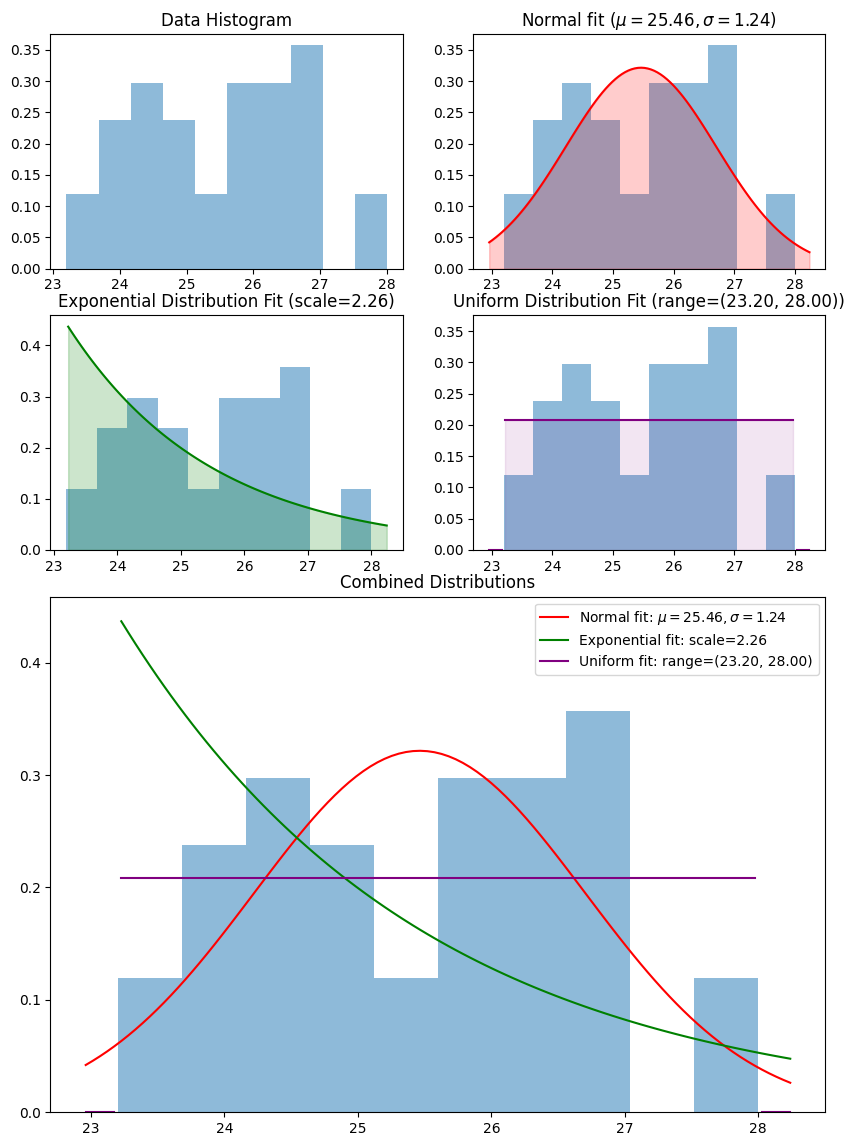

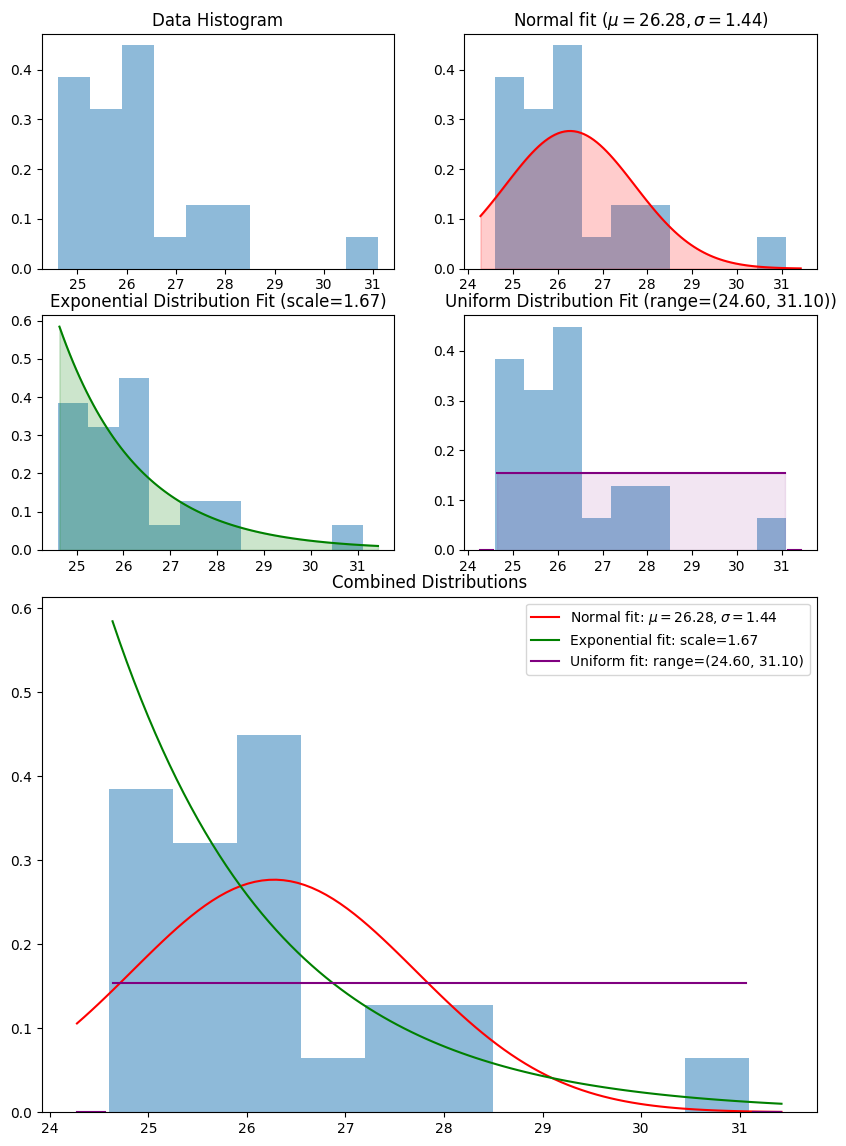

In [8]:
show_distribution(survived)
show_distribution(perished)

## Úloha č. 4

(1b) Pro každou skupinu zvlášť vygenerujte náhodný výběr o 100 hodnotách z rozdělení, 
které jste zvolili jako nejbližší, s parametry odhadnutými v předchozím bodě.
Porovnejte histogram simulovaných hodnot s pozorovanými daty.

In [9]:
def showRandomData(mean, std, dataset, title):
    data = np.random.normal(mean, std, 100)
    plt.figure(figsize=(10, 6))
    x = np.linspace(data.min() - 5, data.max() + 5, 100)
    p_norm = norm.pdf(x, mean, std)
    plt.plot(x, p_norm, 'black', linewidth = 2)
    plt.hist(data, bins = 10, color = "blue", alpha=0.5 , density = True)
    #plt.set_title("Náhodné hodnoty z normálního rozdělení")
    plt.hist(dataset, bins = 10, color = "green", alpha=0.5, density = True)
    plt.show()

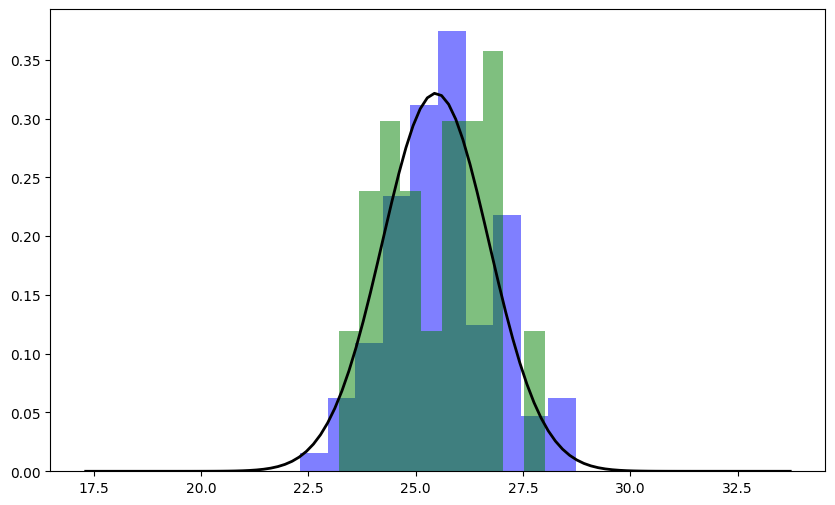

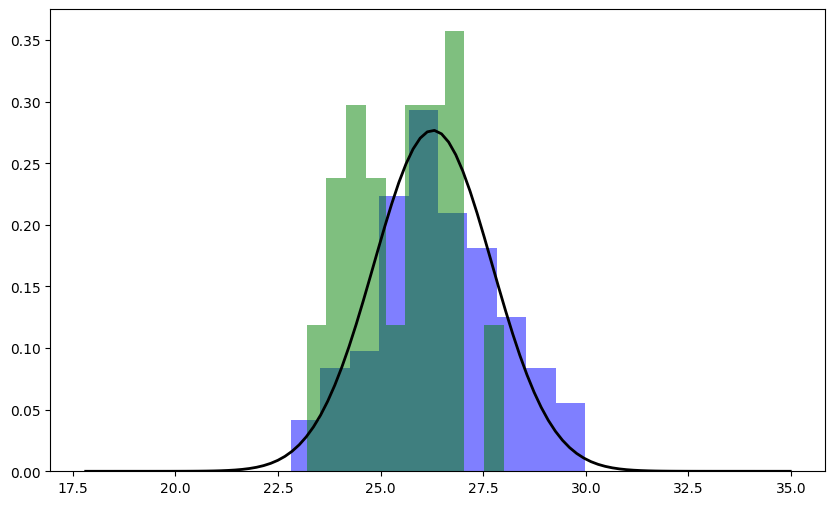

In [10]:
mean_survived, std_survived = norm.fit(survived)
showRandomData(mean_survived, std_survived, survived, "survived")
mean_perished, std_perished = norm.fit(perished)
showRandomData(mean_perished, std_perished, survived, "perished")

## Úloha č. 5

(1b) Pro každou skupinu zvlášť spočítejte oboustranný 95% konfidenční interval pro střední hodnotu.

Dle Studentova rozdělení:
$$
\begin{align}
\left( \overset{\_}{X_{n}} - t_{\frac{\alpha}{2},n-1}\frac{s}{\sqrt{n}}, \overset{\_}{X_{n}} + t_{\frac{\alpha}{2},n-1}\frac{s}{\sqrt{n}} \right)
\end{align}
$$

In [11]:
def conf_interval(data, name):
    conf = stats.t.interval(confidence = 0.95, df = len(data) - 1, loc = np.mean(data), scale = stats.sem(data))
    print(f"Oboustranný konfidenční interval 95% střední hodnoty skupiny \"{name}\":", conf)
    return conf

In [12]:
def plot_conf_interval(title, list, interval):
    fig, ax = plt.subplots(figsize = (6, 4))
    ax.hist(list, bins = 10, color = "blue", alpha=0.5)
    ax.set_title(f"Oboustranný 95% interval skupiny \"{title}\"")
    ax.axvline(x = interval[0], color = "red")
    ax.axvline(x = interval[1], color = "red")
    plt.show()

In [13]:
conf_survived = conf_interval(survived, "survived")
conf_perished = conf_interval(perished, "perished")

Oboustranný konfidenční interval 95% střední hodnoty skupiny "survived": (np.float64(25.030419953409798), np.float64(25.895294593883747))
Oboustranný konfidenční interval 95% střední hodnoty skupiny "perished": (np.float64(25.653248327602988), np.float64(26.89675170418613))


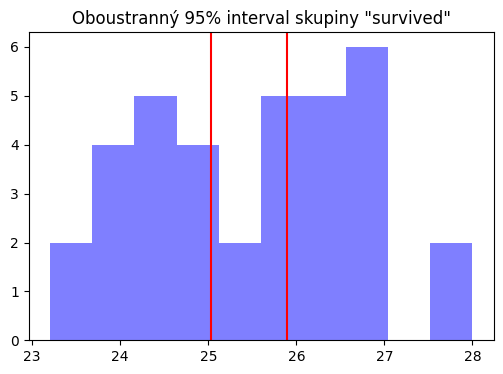

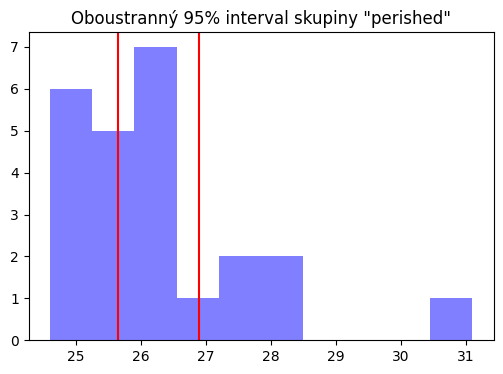

In [14]:
plot_conf_interval("survived", survived, conf_survived)
plot_conf_interval("perished", perished, conf_perished)

## Úloha č. 6

(1b) Pro každou skupinu zvlášť otestujte na hladině významnosti 5 % hypotézu,
zda je střední hodnota rovná hodnotě K (parametr úlohy), proti oboustranné alternativě.
Můžete použít buď výsledek z předešlého bodu, nebo výstup z příslušné vestavěné funkce vašeho softwaru.

In [33]:
for name, group in groups:
    t_stat, p_value = stats.ttest_1samp(group['Weight'], 25)
    print(f"\n--- Výsledky t-testu pro skupinu: {name} ---")
    print(f"T-statistika: {t_stat:.4f}")
    print(f"P-hodnota: {p_value:.4f}")
    
    # Vyhodnocení na hladině významnosti 5 %
    if p_value < 0.05:
        print("Zamítáme nulovou hypotézu (střední hodnota se statisticky významně liší od K).")
    else:
        print("Nezamítáme nulovou hypotézu (střední hodnota se statisticky významně neliší od K).")



--- Výsledky t-testu pro skupinu: perished ---
T-statistika: 4.2421
P-hodnota: 0.0003
Zamítáme nulovou hypotézu (střední hodnota se statisticky významně liší od K).

--- Výsledky t-testu pro skupinu: survived ---
T-statistika: 2.1752
P-hodnota: 0.0367
Zamítáme nulovou hypotézu (střední hodnota se statisticky významně liší od K).


Postupovalo se tak, že se pro každou skupinu provedl t-test k ověření, zda se střední hmotnost vrabců významně liší od hodnoty 25, přičemž se hodnotily p-hodnoty a rozhodovalo se o zamítnutí nulové hypotézy na základě hladiny významnosti 0,05.

Můžeme tedy říci, zda střední váha vrabců v každé skupině odpovídá hodnotě KK, nebo zda se významně liší.

## Úloha č. 7

(2b) Na hladině významnosti 5 % otestujte, jestli mají pozorované skupiny stejnou střední hodnotu.
Typ testu a alternativy stanovte tak, aby vaše volba nejlépe korespondovala s povahou zkoumaného problému.

Byl proveden t-test pro nezávislé vzorky, aby se zjistilo, zda existuje rozdíl ve středních hodnotách mezi skupinami přežití a úmrtí, přičemž byla vyhodnocena p-hodnota a porovnána s hladinou významnosti 0.05.

In [34]:
t_test = stats.ttest_ind(survived, perished, equal_var=True) 
print(f"T-test: T-statistika = {t_test.statistic:.5f}, p-hodnota = {t_test.pvalue:.5f}")

alpha = 0.05
if t_test.pvalue < alpha:
    print("Zamítáme nulovou hypotézu. Skupiny mají různé střední hodnoty.")
else:
    print("Nepodařilo se zamítnout nulovou hypotézu. Skupiny mají stejné střední hodnoty.")



T-test: T-statistika = -2.27141, p-hodnota = 0.02692
Zamítáme nulovou hypotézu. Skupiny mají různé střední hodnoty.


Pokud byla p-hodnota t-testu menší než 0.05, zamítli jsme nulovou hypotézu, což znamená, že střední váha vrabců se mezi skupinami liší. To naznačuje, že faktory ovlivňující přežití mohou souviset s hmotností vrabců, což by mohlo mít vliv na jejich schopnost se přizpůsobit obtížným podmínkám.

Z analýzy tedy vyplývá, že mezi skupinami existuje významný rozdíl ve středních hodnotách.